In [1]:
import matplotlib.pyplot as plt
import numpy as np
from read_colvar import read_colvar
from read_xvg import read_xvg
from multi_colvar import multi_colvar
from scipy.signal import argrelextrema
from scipy.signal import argrelextrema
from multi_xvg import multi_xvg
from distance_plot import distance_plot

# If you encounter this error:
# **''GromacsImportWarning: Some Gromacs commands were NOT found; maybe source GMXRC first? The following are missing:
# ['release'] category=GromacsImportWarning)''**
# just ignore it and it will be fine. Or rerun the cell and the error will disappear.

/Users/xieyan/anaconda3/lib/python3.7/site-packages/GromacsWrapper-0.8.0-py3.7.egg/gromacs/__init__.py:272: GromacsImportWarning: Some Gromacs commands were NOT found; maybe source GMXRC first? The following are missing:
['release']

  category=GromacsImportWarning)


# Data loading

In [2]:
help(read_colvar)

Help on function read_colvar in module read_colvar:

read_colvar(fname, verbose=False)
    Load colvar file.
    
    Parameters:
    
    fname: Str, the name of colvar file. 
    
    verbose: False or True. False hides the loaded file's name, and True shows the name.
    
    Returns:
    
    df: return a dataframe that contains the simulation time and distances



In [3]:
dd=read_colvar('Data/COLVAR1',verbose=True) #load the distance colvar data file

Data/COLVAR1


In [4]:
dd.tail(2)

time        d3        d4        d5        d6        d7  \
9999    9999.000475  3.196299  3.334442  3.030299  3.661815  3.286917   
10000  10000.000475  3.261634  3.350351  3.160027  3.588662  3.125139   

             d8        d9       d10          d  metad.bias  
9999   3.320262  2.605967  3.298055  10.316519   30.590245  
10000  3.242978  2.510171  3.157369  10.181991   33.115783

In [5]:
f = read_xvg('Data/interaction_energy_1.xvg',verbose=True) #load the interaction energy xvg data file

Data/interaction_energy_1.xvg


In [6]:
f.tail(2)

time  ie_3  ie_4  ie_5  ie_6  ie_7  ie_8  ie_9  ie_10  ie_tot
999    9.99   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0     0.0
1000  10.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0     0.0

In [7]:
dc=multi_colvar(4)    #load the distance colvar data files at most from 10 parallel simulation

Data/COLVAR1
Data/COLVAR2
Data/COLVAR3
Data/COLVAR4


In [8]:
len(dc)

4

In [9]:
type(dc)

list

In [14]:
dxvg=multi_xvg(4) #load the interaction energy xvg data files at most from 10 parallel simulation

Data/interaction_energy_1.xvg
Data/interaction_energy_2.xvg
Data/interaction_energy_3.xvg
Data/interaction_energy_4.xvg


In [11]:
len(dxvg)   # make sure len(dxvg)==len(dc), otherwise we won't be able to do the comparison plot later

3

In [25]:
dxvg[0].head(2)

time  ie_3        ie_4      ie_5        ie_6      ie_7        ie_8  \
0  0.00   0.0 -162.103069 -0.083115  -95.855503 -0.011383 -142.794924   
1  0.01   0.0 -147.587871 -0.212957 -107.105373 -0.005089 -137.722553   

       ie_9     ie_10      ie_tot  
0 -0.000089 -1.791406 -402.639489  
1  0.000000 -1.087669 -393.721512

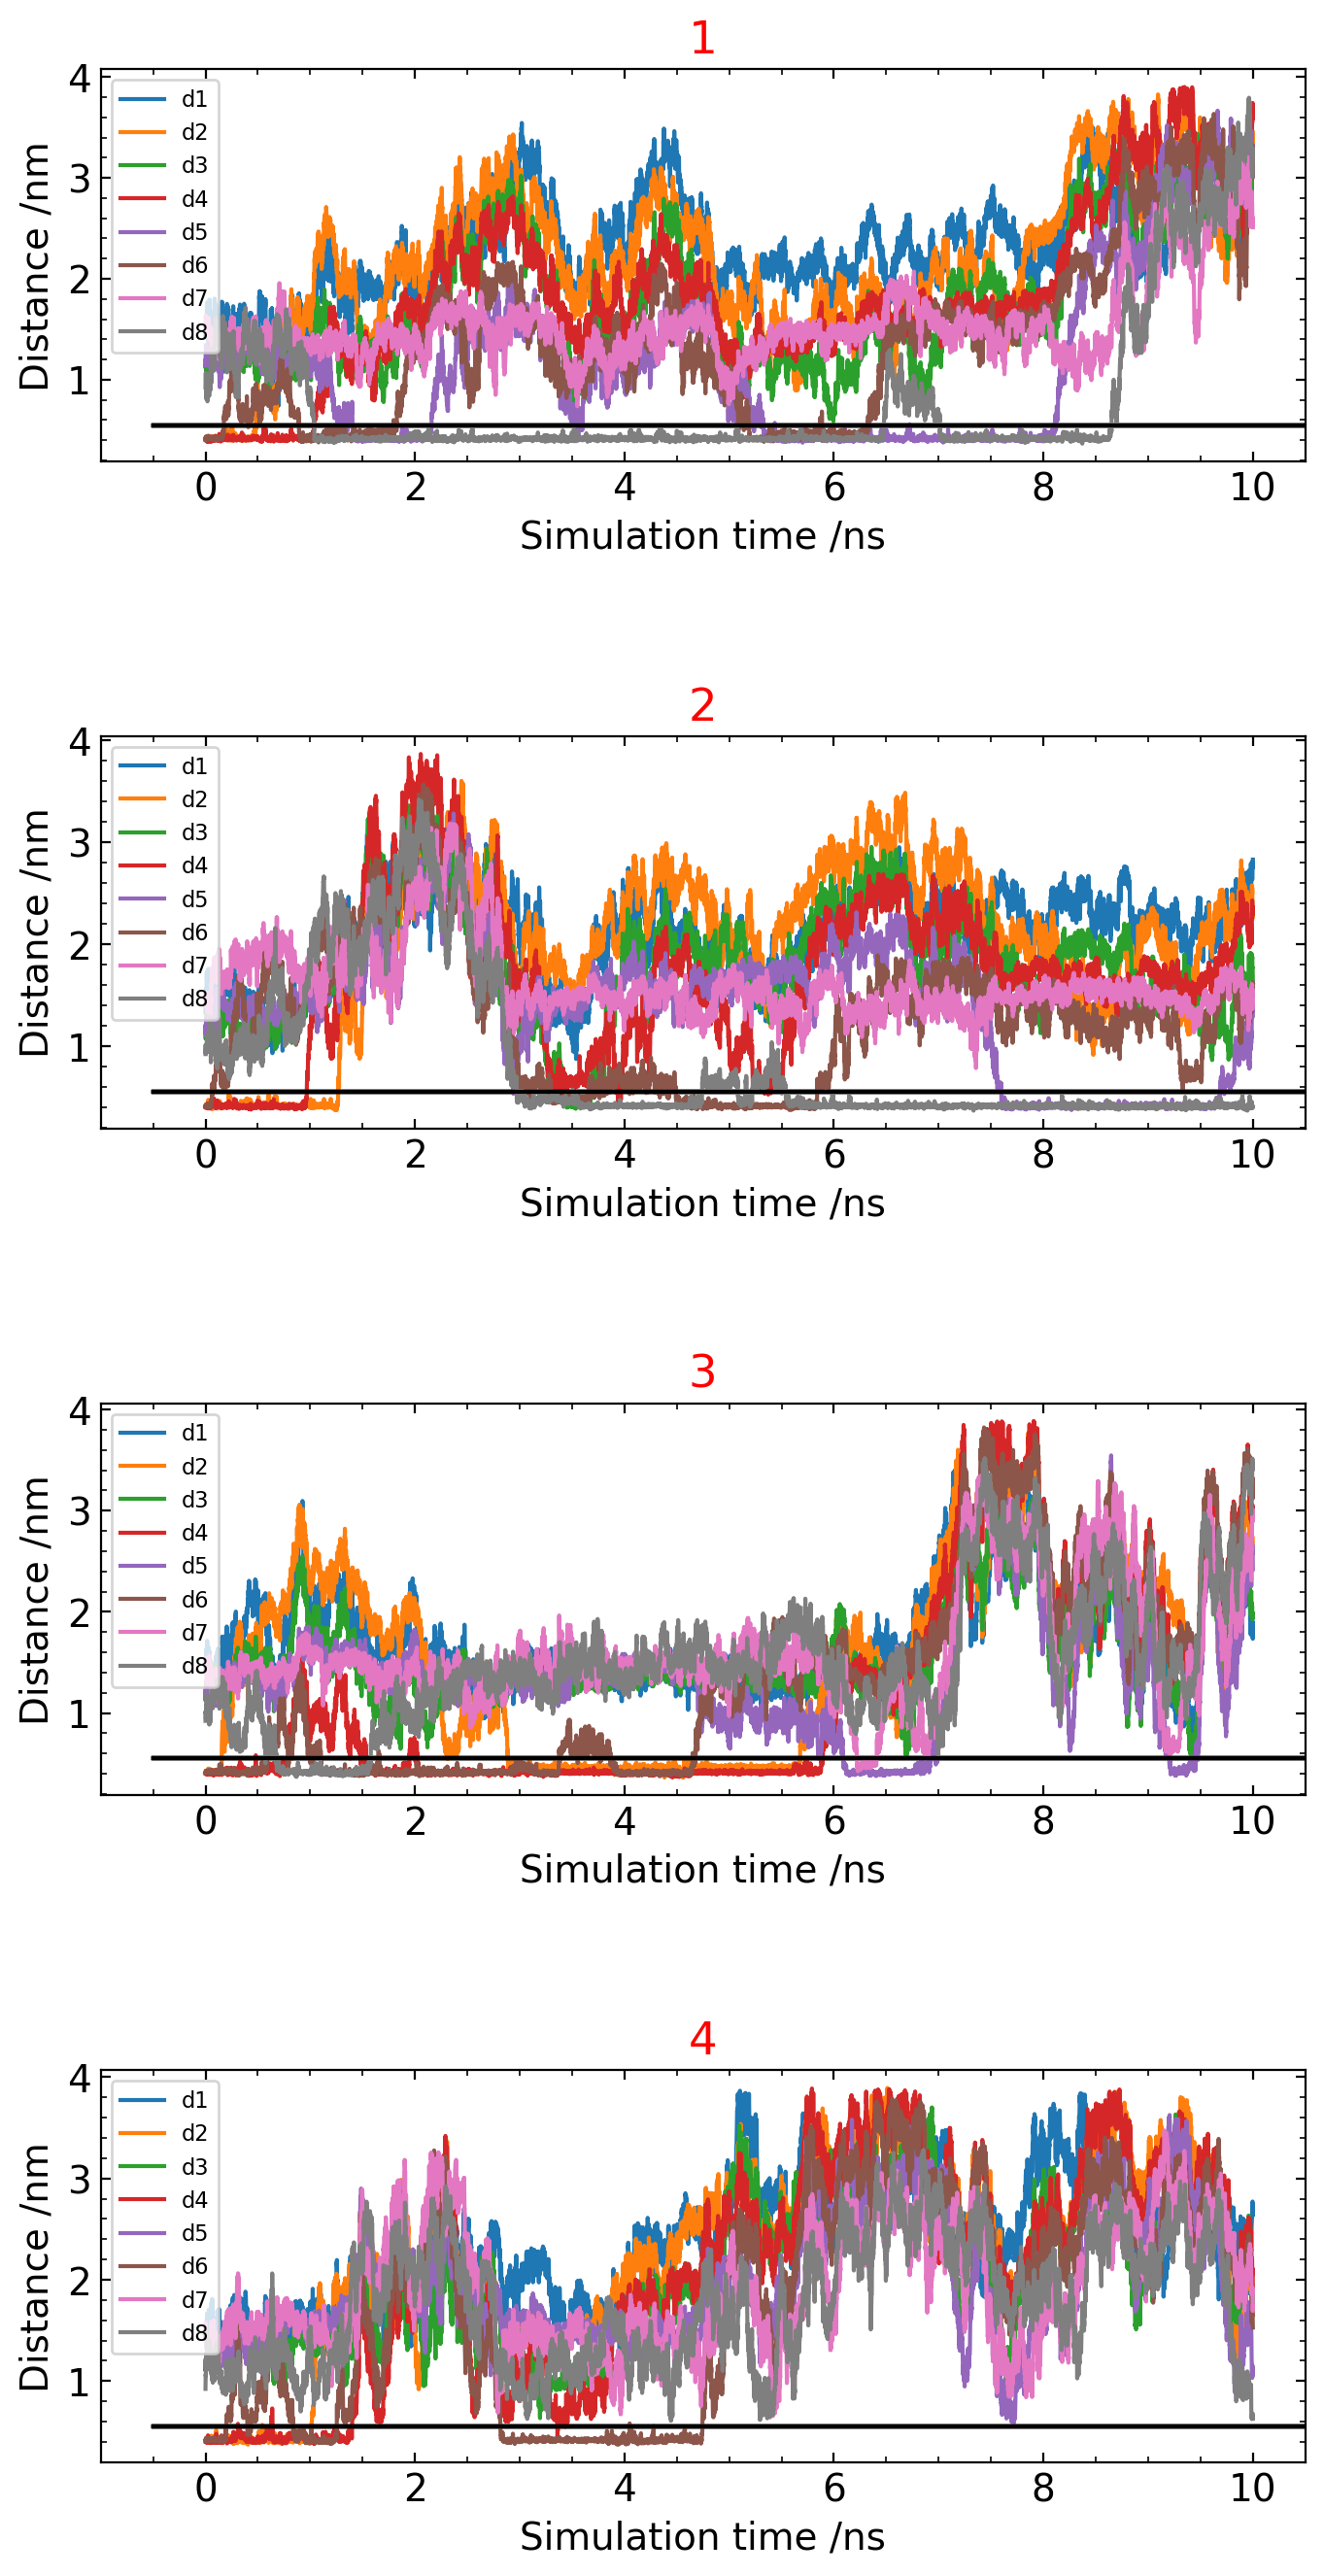

True

In [29]:
distance_plot(dc) # plot the distance evolution over time

# Interaction process visualization in terms of distances and interaction energy

In [12]:
from association_num import association_num
from association_plot import association_plot

In [16]:
dc=association_num(dc)  # Here is to define the threshold distance (0.5 nm)  of interacting residues and calculate the totoal number of association

True

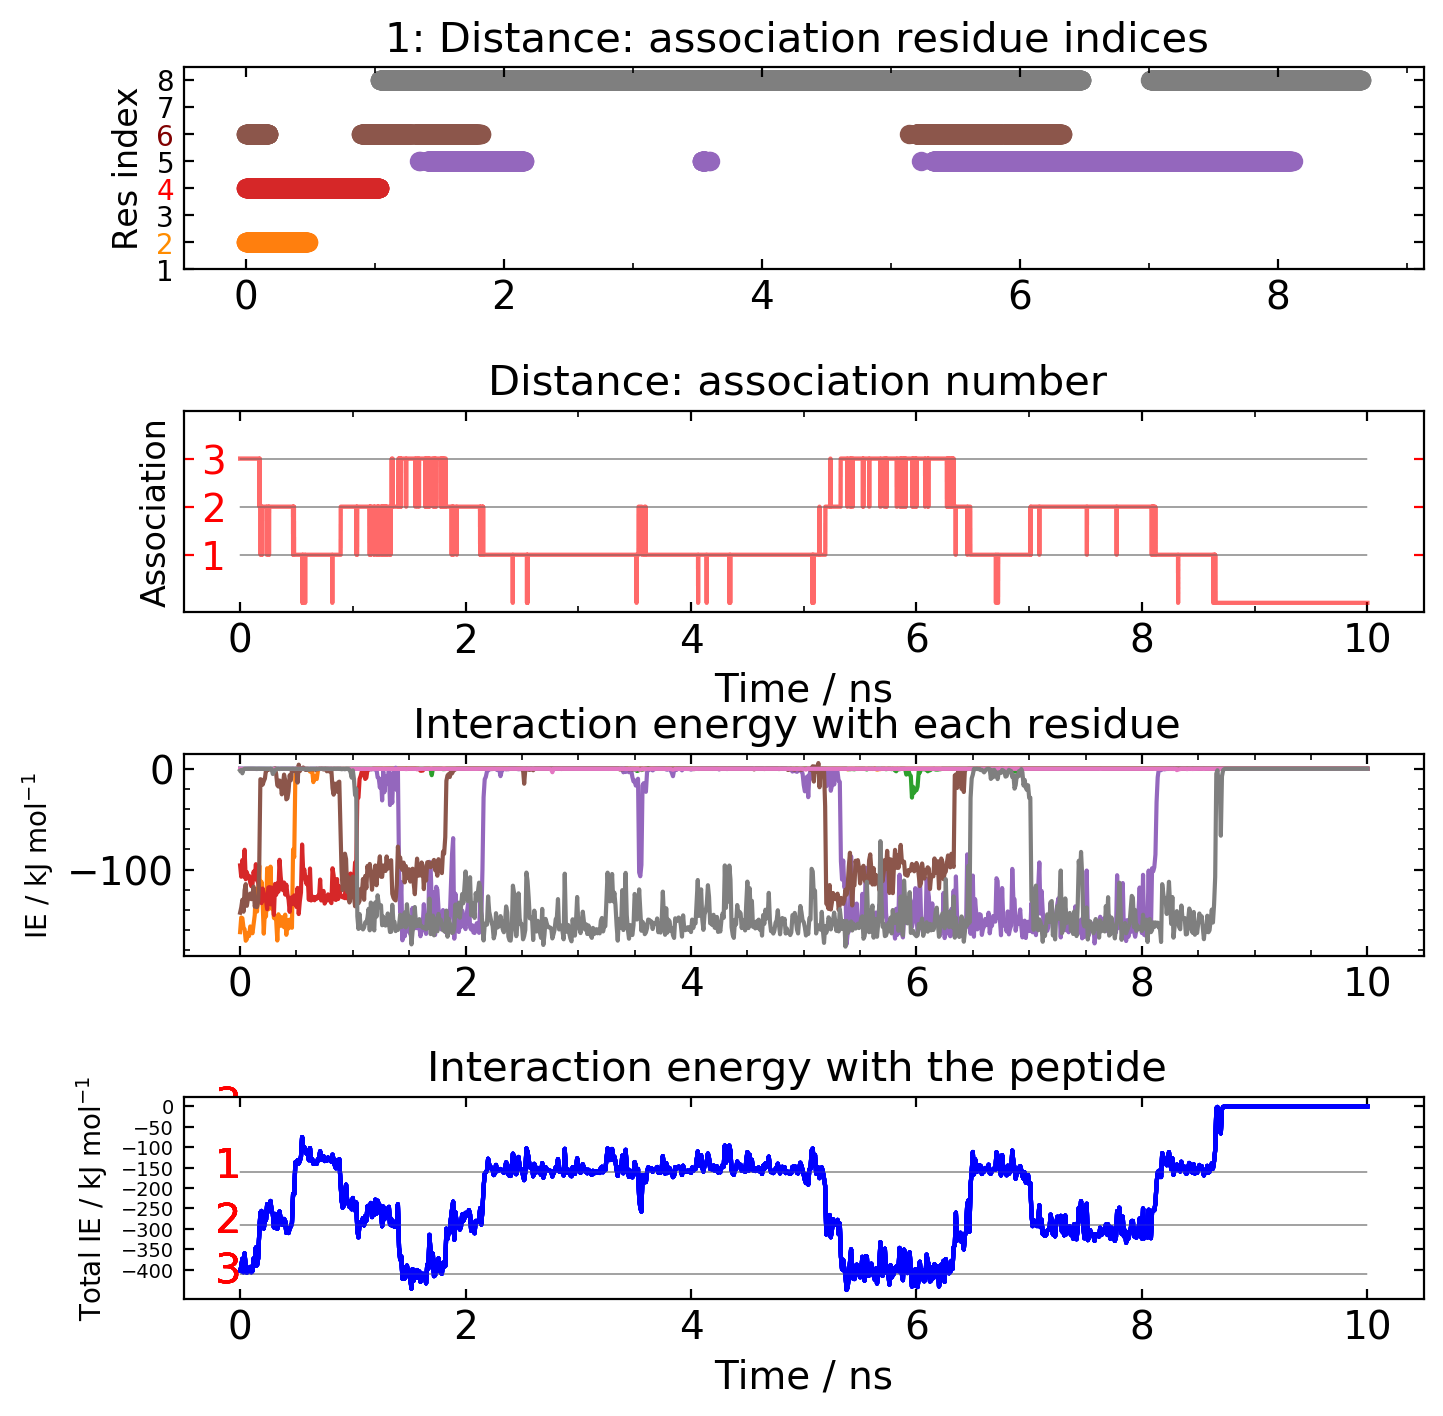

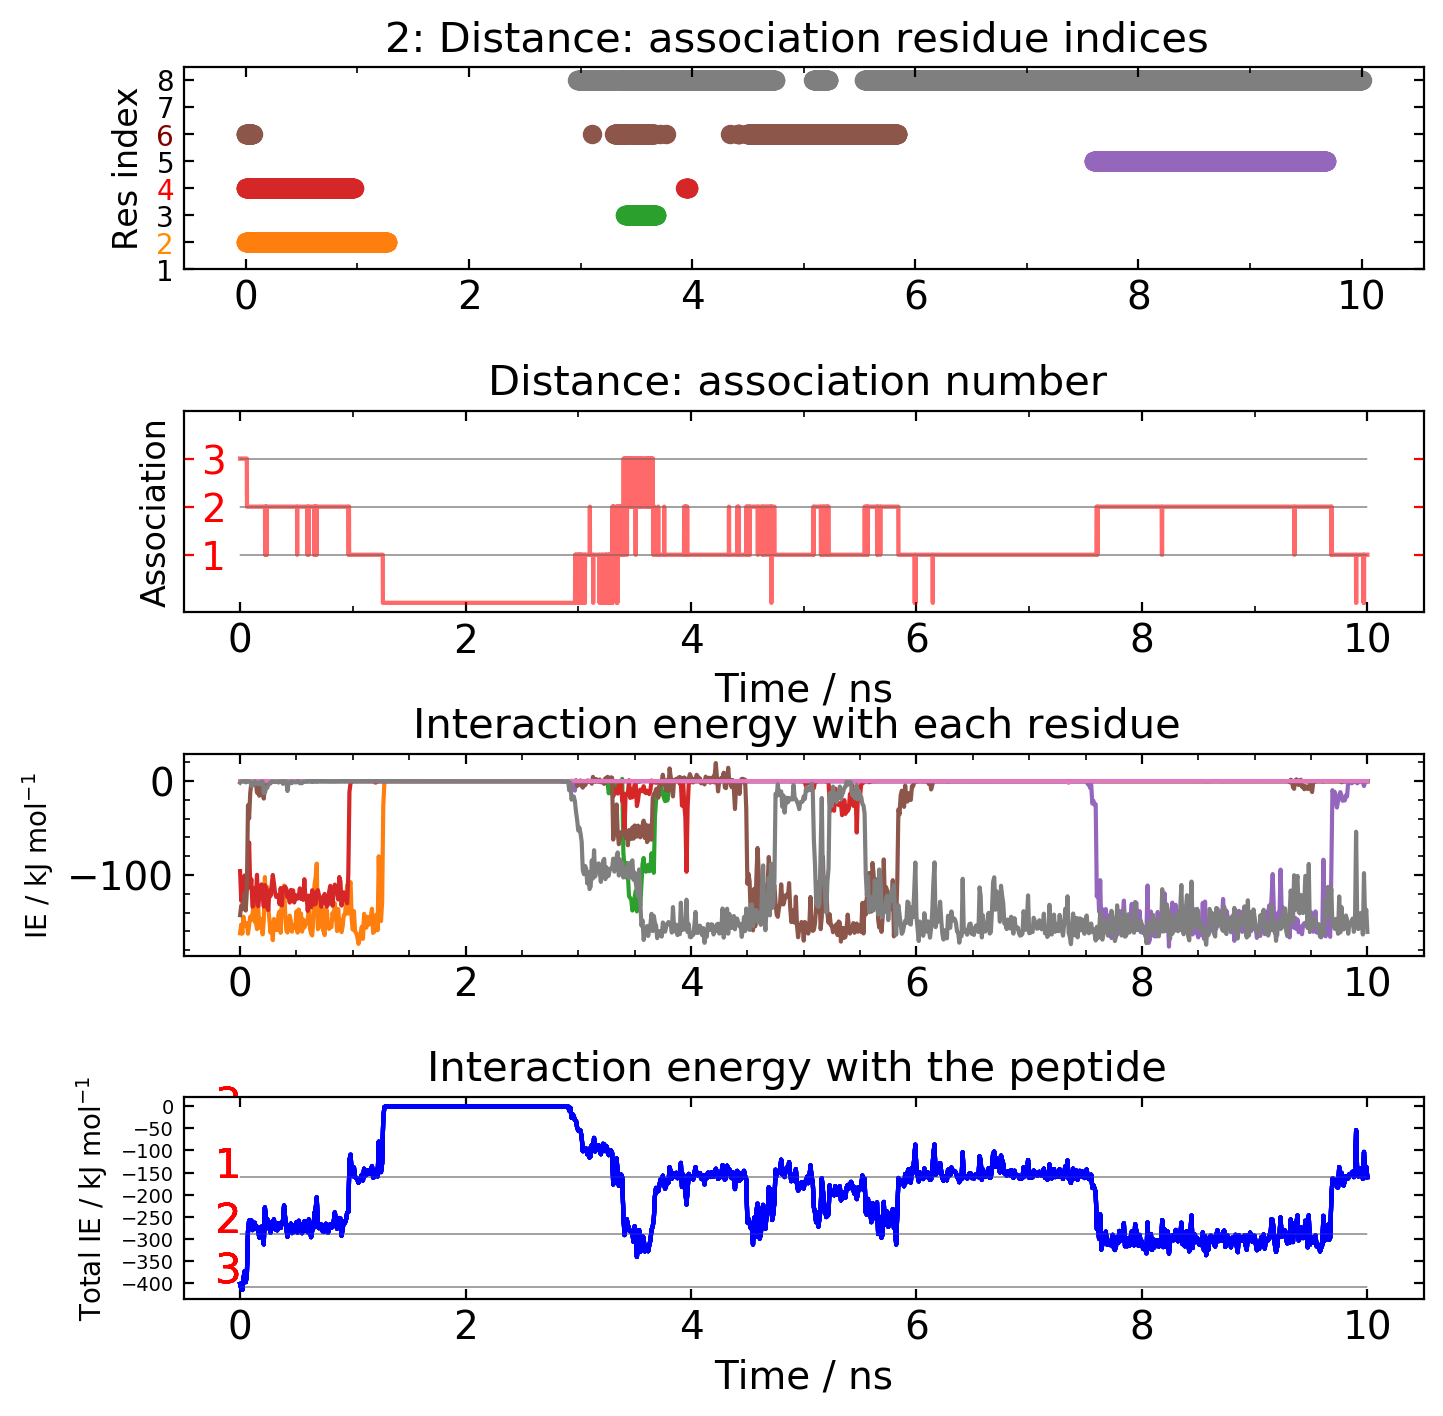

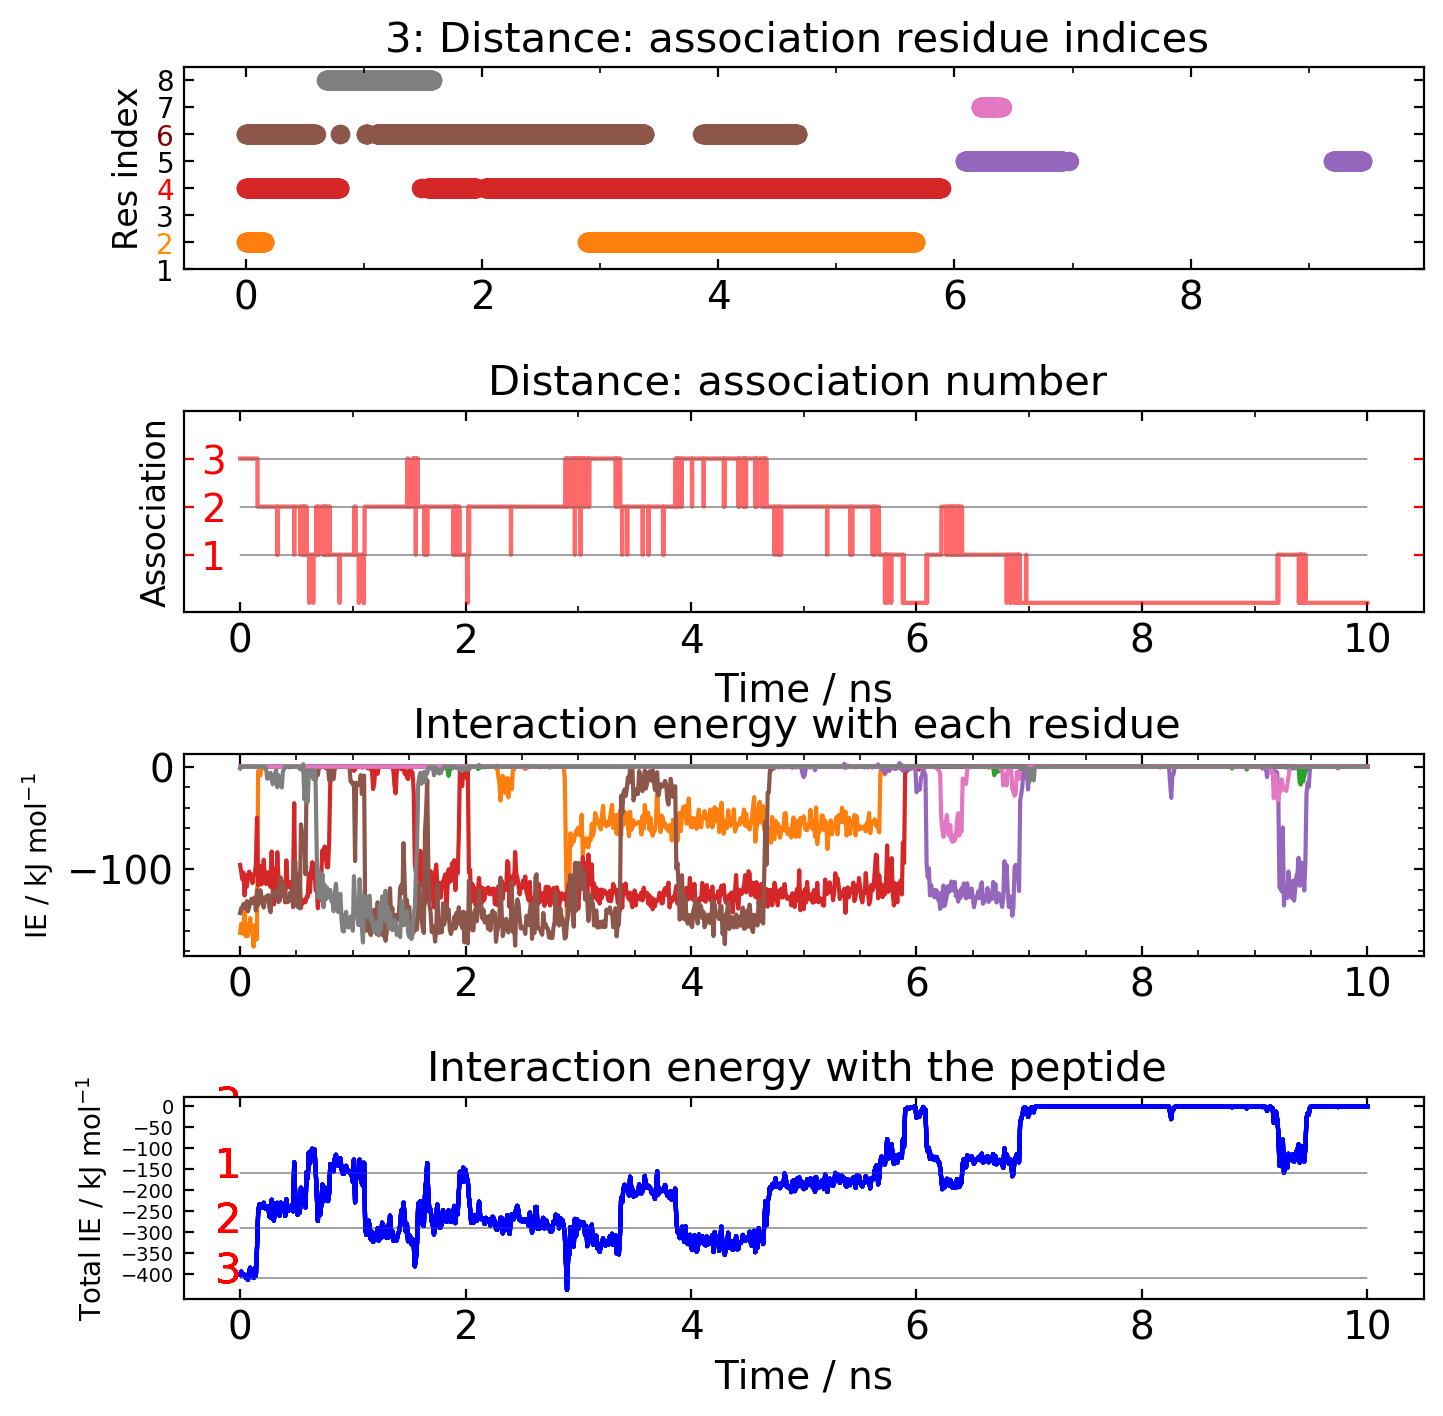

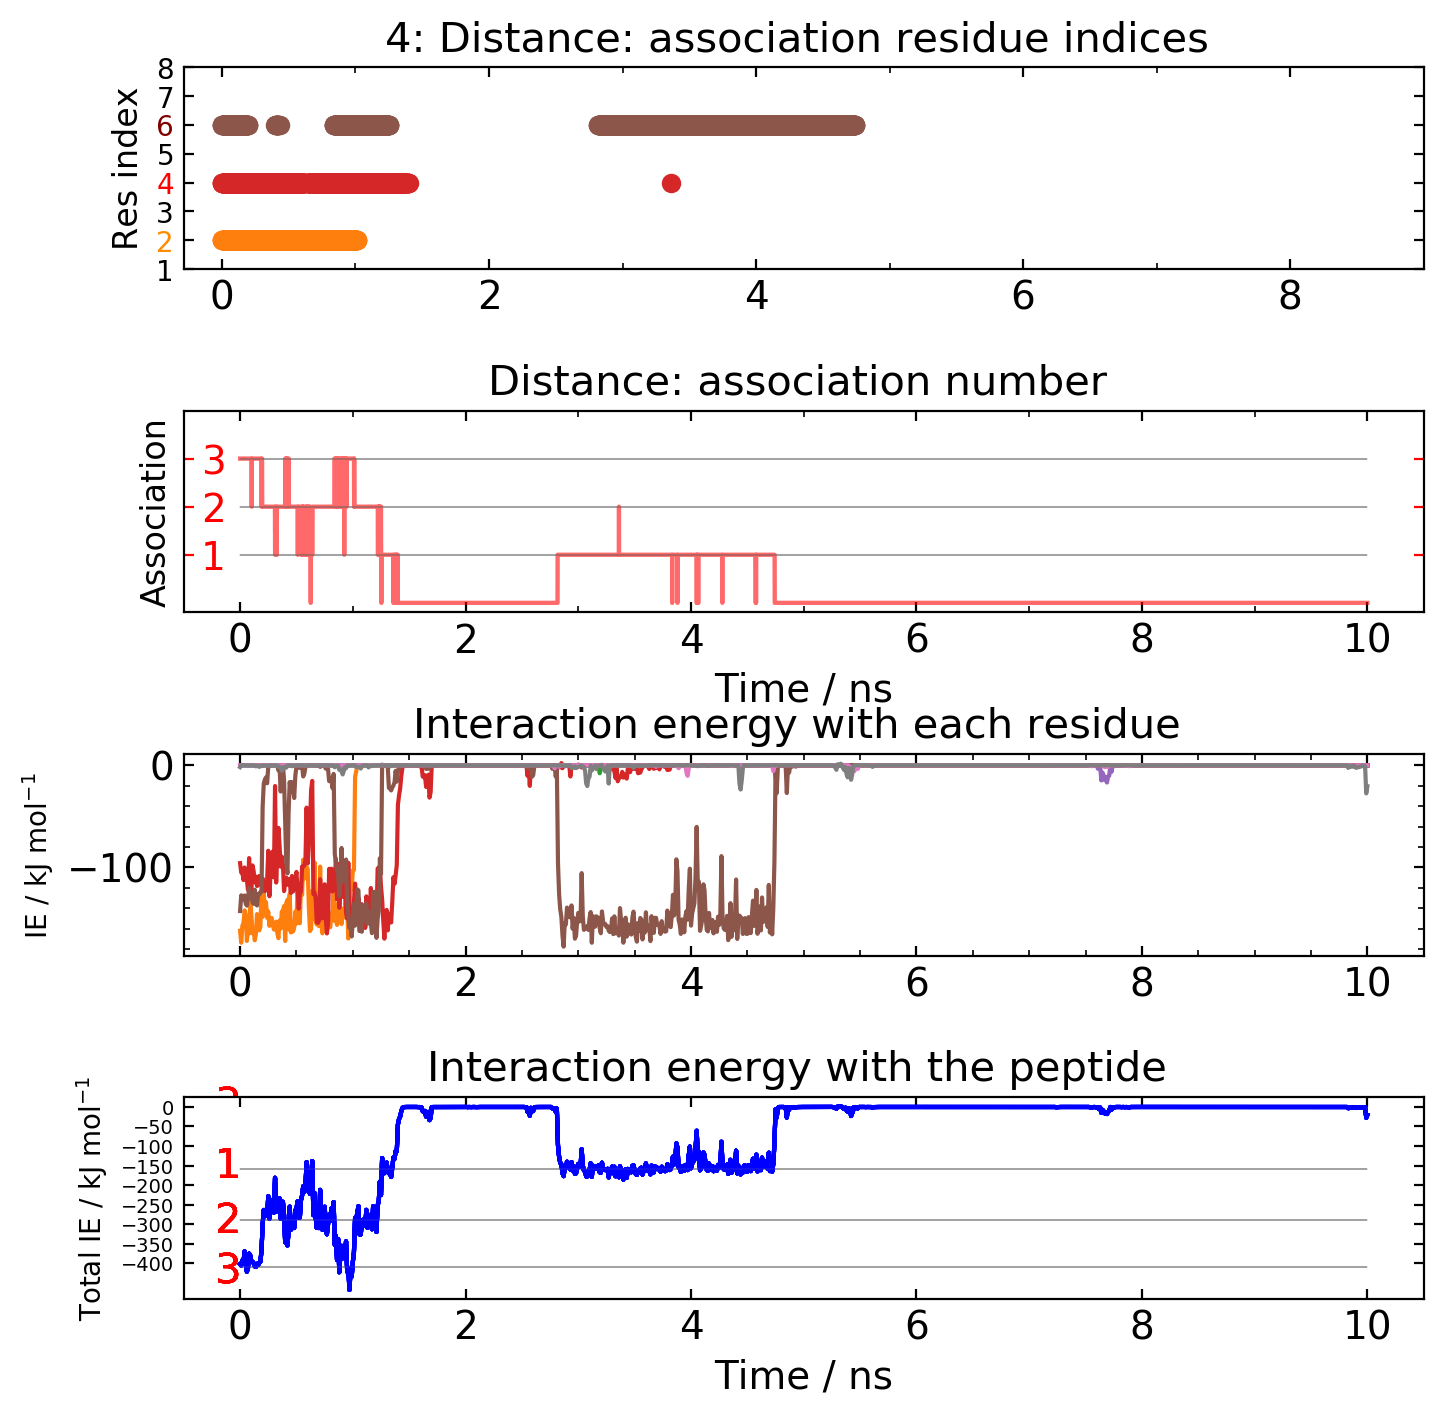

In [17]:
association_plot(dc,dxvg) # plot the distance and interaction energy comparison for each single run.

# Interaction energy distribution analysis

[-449.974644, -416.460687, -438.70159600000005, -468.93336899999997]
3


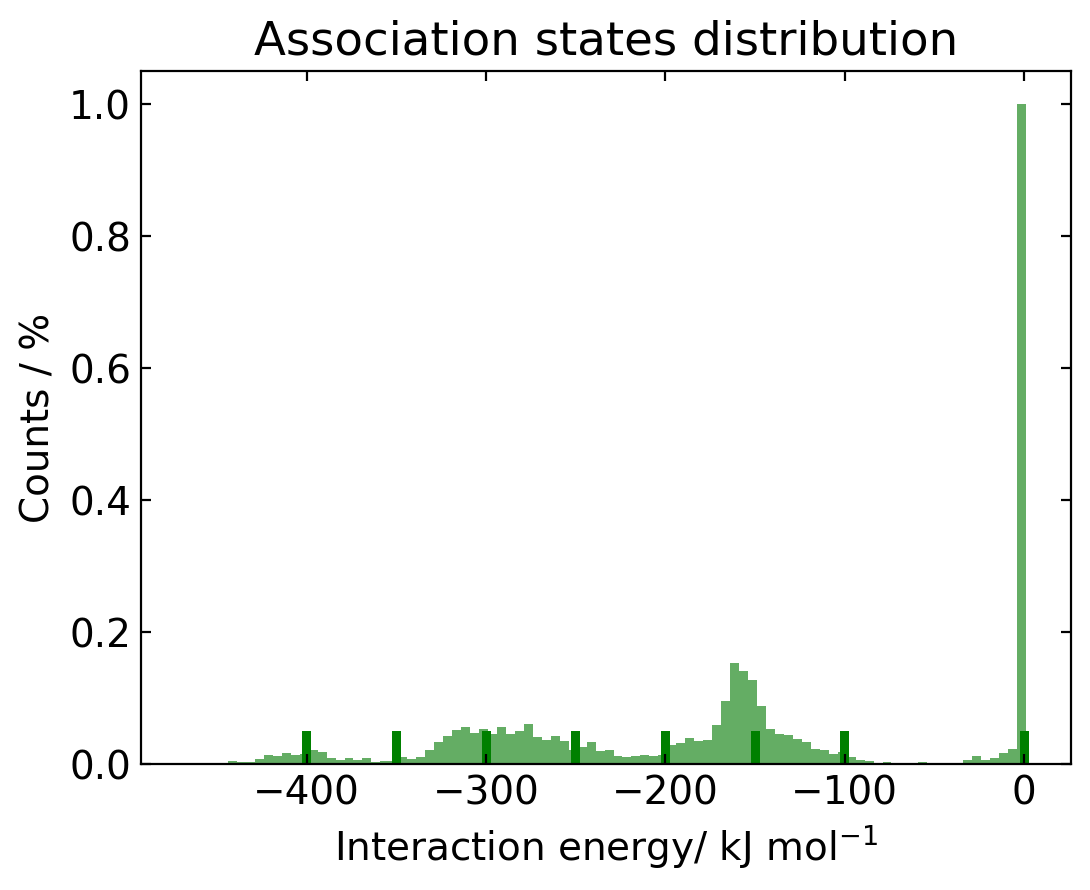

The most frequent energy state is: -3.9333689999999706 kJ/mol


In [18]:
ally=[]
for d in dxvg:
    ally.extend(d["ie_tot"])
allx=[]
for d in dxvg:
    bins= np.arange(min(d["ie_tot"]), 5, 5)
    allx.append(bins)
allx0 = [item[0] for item in allx]
print(allx0)
ind = np.argmin(allx0)
print(ind)
hist,bins=np.histogram(ally,bins=allx[ind])
width=bins[1]-bins[0]
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist/float(max(hist)),align='center',width=width,facecolor='forestgreen',alpha=0.7)
plt.bar([0,-100,-150,-200,-250,-300,-350,-400],[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],color='g', align='center', width=width)
plt.xlabel('Interaction energy/ kJ mol$^{-1}$')
plt.ylabel('Counts / %')
plt.title('Association states distribution')

plt.show()
idx=np.argmax(hist)
print('The most frequent energy state is:',bins[idx],'kJ/mol')

In [19]:
nmin=argrelextrema(hist[0:], np.less,order=2)
print(bins[nmin])
print(nmin)
print(len(hist))

[-363.933369 -253.933369 -223.933369  -68.933369]
(array([21, 43, 49, 80]),)
94


In [20]:
#Manually input the length of different association states based on the histogram plot and the mininum positions

x1=range(0,21,1)
tot_1=0
for i in x1:
    tot_1 +=hist[i]
tot_2=0
x2=range(21,49,1)
for i in x2:
    tot_2 +=hist[i]
tot_3=0
x3=range(49,80,1)
for i in x3:
    tot_3 +=hist[i]
tot_4=0
x4=range(80,94,1)
for i in x4:
    tot_4 +=hist[i]
tot=tot_1+tot_2+tot_3+tot_4
print('Triple association:', round((tot_1/tot)*100,2),"%")
print('Double association:',round((tot_2/tot)*100,2),"%")
print('Single association:',round((tot_3/tot)*100,2),"%")
print('None association:',round((tot_4/tot)*100,2),"%")

Triple association: 5.15 %
Double association: 26.53 %
Single association: 36.25 %
None association: 32.08 %
